# Regression on employee data:

In [1]:
import pandas as pd

emp = pd.read_csv("employee_data.csv")
emp

Unnamed: 0   id groups  age  healthy_eating  active_lifestyle  salary
0             0    0      A   36               5                 5    2297
1             1    1      A   55               3                 5    1134
2             2    2      A   61               8                 1    4969
3             3    3      O   29               3                 6     902
4             4    4      O   34               6                 2    3574
5             5    5      O   42               5                 3    2761
6             6    6     AB   53               4                 6    1484
7             7    7      B   41               8                 6    3809
8             8    8      A   47               5                 6    2065
9             9    9      A   31               4                 8    1020
10           10   10      A   47               6                 9    1950
11           11   11      O   40               7                 1    4387
12           12   12      O   41               3                 2    1830
13           13   13      O   46               6                 8    2182
14           14   14     AB   51               7                 5    3460
15           15   15      B   57               3                 8     662
16           16   16      A   33               3                 5    1134
17           17   17      A   41               4                 8    1020
18           18   18      A   46               2                 6     779
19           19   19      O   32               7                 6    3228
20           20   20      O   57               7                 6    3228
21           21   21      O   26               1                 6    1360
22           22   22     AB   59               7                 5    3460
23           23   23      B   55               6                 4    3110
24           24   24      A   51               5                 8    1601
25           25   25      A   63               6                 7    2414
26           26   26      A   62               9                 6    4390
27           27   27      O   37               3                 5    1134
28           28   28      O   63               6                 7    2414
29           29   29      O   20               8                 6    3809
..          ...  ...    ...  ...             ...               ...     ...
970         970  970      A   36               4                 8    1020
971         971  971      O   33               2                 8    1243
972         972  972      O   56               6                 3    3342
973         973  973      O   47               3                 6     902
974         974  974     AB   64              10                 5    5204
975         975  975      B   43               4                 6    1484
976         976  976      A   20               6                 4    3110
977         977  977      A   59               2                 6     779
978         978  978      A   61               3                 6     902
979         979  979      O   18               7                 8    2764
980         980  980      O   58               5                 5    2297
981         981  981      O   31               5                 9    1369
982         982  982     AB   50               9                 5    4622
983         983  983      B   29               5                 6    2065
984         984  984      A   32               3                 9     894
985         985  985      A   52               4                 3    2179
986         986  986      A   27               6                 7    2414
987         987  987      O   50               5                 5    2297
988         988  988      O   60               4                 6    1484
989         989  989      O   44               3                 5    1134
990         990  990     AB   20               3                 4    1366
991         991  991      B   

In [2]:
#Setting features and labels
import numpy as np

features = np.array(emp.iloc[:,2:6])
salary = np.array(emp.iloc[:,[6]])

In [3]:
#Normalizing group
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
features[:,0] = labelencoder_X.fit_transform(features[:,0])
onehotencoder = OneHotEncoder(categorical_features=[0])

In [4]:
#Splitting training and testing groups
from sklearn.model_selection import train_test_split

Features_Train, Features_Test, Salary_Train, Salary_Test = train_test_split(features, salary, test_size=0.2, random_state=0)

In [5]:
#Training model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(Features_Train, Salary_Train)

#Predicting with dataset
Salary_Predicts = LR.predict(Features_Test)

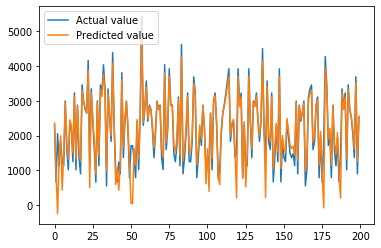

In [31]:
#Plotting graph
import numpy as np
import matplotlib.pyplot as plt

Sorted_Test = np.sort(Salary_Test)
Sorted_Predicts = np.sort(Salary_Predicts)
plt.plot(range(len(Salary_Test)), np.sort(Sorted_Test), label="Actual value")
plt.plot(range(len(Salary_Test)), np.sort(Sorted_Predicts), label="Predicted value")
plt.legend(loc="upper left")
plt.show()

In [32]:
#Checking Mean Squared error
from sklearn.metrics import mean_squared_error

print("Our mean squared error is:", mean_squared_error(Salary_Test, Salary_Predicts))
print("Weight:", LR.coef_)
print("Intercept:", LR.intercept_)

Our mean squared error is: 152789.1811795512
Weight: [[ 9.01682111e+00 -3.34011170e-01  4.69684687e+02 -1.85910382e+02]]
Intercept: [961.34946519]


## HR Dataset:

In [8]:
HR = pd.read_csv("HRDataset_v13.csv")
#HR = HR.iloc[0:301]

In [9]:
HR

Employee_Name       EmpID  MarriedID  MaritalStatusID  \
0                  Brown, Mia  1103024456          1                1   
1        LaRotonda, William    1106026572          0                2   
2            Steans, Tyrone    1302053333          0                0   
3             Howard, Estelle  1211050782          1                1   
4                 Singh, Nan   1307059817          0                0   
5            Smith, Leigh Ann   711007713          1                1   
6            Bunbury, Jessica  1504073368          1                1   
7           Carter, Michelle   1403065721          0                0   
8           Dietrich, Jenna    1408069481          0                0   
9            Digitale, Alfred  1306059197          1                1   
10            Friedman, Gerry  1204032843          0                0   
11            Gill, Whitney    1302053046          0                4   
12          Gonzales, Ricardo  1411071481          1                1   
13            Guilianno, Mike  1001167253          0                0   
14           Leruth, Giovanni  1412071660          0                3   
15           Mullaney, Howard  1306057978          0                0   
16              Ozark, Travis   812011761          0                0   
17            Strong, Caitrin  1411071295          1                1   
18            Valentin,Jackie  1312063714          1                1   
19           Villanueva, Noah  1111030503          0                0   
20               Buck, Edward  1504073313          1                1   
21               Costa, Latia  1409070567          0                0   
22             Fraval, Maruk   1411071302          0                0   
23             Givens, Myriam  1203032099          0                0   
24              Jeremy Prater  1001084890          1                1   
25      Khemmich, Bartholemew  1104025008          0                0   
26            Martins, Joseph  1209048771          0                0   
27              McKinzie, Jac  1209049326          1                1   
28             Nguyen, Dheepa  1111030684          0                0   
29             Onque, Jasmine  1501072180          0                0   
..                        ...         ...        ...              ...   
280          Thibaud, Kenneth  1011022777          0                4   
281            Daneault, Lynn  1402065303          0                0   
282           Kampew, Donysha  1109029264          0                0   
283               Smith, John  1499902910          0                2   
284                  Le, Binh  1009919930          0                0   
285             Navathe, Kurt  1009919960          0                0   
286             Wang, Charlie  1009919970          0                0   
287       LeBlanc, Brandon  R  1102024115          1                1   
288               Quinn, Sean  1206043417          1                1   
289           Andreola, Colby  1107027358          0                0   
290          Carabbio, Judith  1101023577          0                0   
291         Del Bosque, Keyla  1203032498          0                0   
292            Exantus, Susan  1401064670          1                1   
293            Martin, Sandra  1303054625          0                0   
294           Patronick, Luke  1112030979          0                0   
295              Saada, Adell  1012023185          1                1   
296             Szabo, Andrew  1201031324          0                0   
297              True, Edward  1102024057          0                0   
298          Sweetwater, Alex  1001644719          0                0   
299         Foster-Baker, Amy  1201031308          1                1   
300         Boutwell, Bonalyn  1307060188          1                1   
301  Ait Sidi, Karthikeyan     1307060199          1                1   
302          Carr, Claudia  N  1010022337          0                0   
3

In [10]:
HR.describe()

EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count  3.100000e+02  310.000000       310.000000  310.000000   310.000000   
mean   1.199745e+09    0.396774         0.809677    0.429032     2.396774   
std    1.829600e+08    0.490019         0.944702    0.495738     1.795533   
min    6.020003e+08    0.000000         0.000000    0.000000     1.000000   
25%    1.101024e+09    0.000000         0.000000    0.000000     1.000000   
50%    1.203032e+09    0.000000         1.000000    0.000000     1.000000   
75%    1.378814e+09    1.000000         1.000000    1.000000     5.000000   
max    1.988300e+09    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID     PayRate  \
count  310.000000   310.000000              310.000000  310.000000   
mean     4.606452     2.983871                0.093548   31.284806   
std      1.082349     0.577124                0.291670   15.383615   
min      1.000000     1.000000                0.000000   14.000000   
25%      5.000000     3.000000                0.000000   20.000000   
50%      5.000000     3.000000                0.000000   24.000000   
75%      5.000000     3.000000                0.000000   45.315000   
max      6.000000     4.000000                1.000000   80.000000   

            Termd  PositionID           Zip   ManagerID  EngagementSurvey  \
count  310.000000  310.000000    310.000000  302.000000        310.000000   
mean     0.332258   16.838710   6569.732258   14.579470          3.332097   
std      0.471785    6.232272  16933.864054    8.090352          1.290590   
min      0.000000    1.000000   1013.000000    1.000000          1.030000   
25%      0.000000   18.000000   1901.250000   10.000000          2.082500   
50%      0.000000   19.000000   2132.000000   15.000000          3.470000   
75%      1.000000   20.000000   2357.000000   19.000000          4.520000   
max      1.000000   30.000000  98052.000000   39.000000          5.000000   

       EmpSatisfaction  SpecialProjectsCount  DaysLateLast30  
count       310.000000            310.000000           207.0  
mean          3.890323              1.209677             0.0  
std           0.910690              2.352009             0.0  
min           1.000000              0.000000             0.0  
25%           3.000000              0.000000             0.0  
50%           4.000000              0.000000             0.0  
75%           5.000000              0.000000             0.0  
max           5.000000              8.000000             0.0

In [11]:
features = HR.loc[:, ['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'FromDiversityJobFairID', 'PayRate', 'Termd',
       'PositionID', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount']]
labels = np.array(HR.loc[:,'PerfScoreID'])

In [12]:
#Removing null values
features.isnull().sum()

MarriedID                 0
MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
FromDiversityJobFairID    0
PayRate                   0
Termd                     0
PositionID                0
ManagerID                 8
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
dtype: int64

In [13]:
features[features.ManagerID.isnull()] = features[features.ManagerID.isnull()].fillna(15.0)

In [14]:
features.isnull().sum()

MarriedID                 0
MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
FromDiversityJobFairID    0
PayRate                   0
Termd                     0
PositionID                0
ManagerID                 0
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
dtype: int64

In [15]:
features = np.array(features)

In [16]:
features

array([[1.  , 1.  , 0.  , ..., 2.04, 2.  , 6.  ],
       [0.  , 2.  , 1.  , ..., 5.  , 4.  , 4.  ],
       [0.  , 0.  , 1.  , ..., 3.9 , 5.  , 5.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 3.27, 4.  , 5.  ],
       [0.  , 0.  , 1.  , ..., 5.  , 3.  , 4.  ],
       [0.  , 4.  , 0.  , ..., 1.06, 4.  , 8.  ]])

In [17]:
labels = (labels==3.0).astype(np.int)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [18]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

Features_Train, Features_Test, Labels_Train, Labels_Test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [25]:
#Performing logistic Regression classification
from sklearn.linear_model import LogisticRegression

LRC = LogisticRegression()

LRC.fit(Features_Train, Labels_Train)

#Predicting with dataset
Labels_Predict = LRC.predict(Features_Test)
print(Labels_Predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\msi1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
from sklearn.metrics import mean_squared_error

print("Our mean squared error is:", mean_squared_error(Labels_Test, Labels_Predict))
print("Weight:", LRC.coef_)
print("Intercept:", LRC.intercept_)

Our mean squared error is: 0.16129032258064516
Weight: [[ 0.16451044  0.02397936 -0.07660711  0.3870194  -0.33528522 -0.93840077
   0.00299595 -1.15510103 -0.02122923  0.01754209  0.2074435   0.361101
   0.01009059]]
Intercept: [0.29425601]


In [24]:
#Performing KNN classification
from sklearn.neighbors import KNeighborsClassifier

KNNC = KNeighborsClassifier()

KNNC.fit(Features_Train, Labels_Train)

#Predicting with dataset
Labels_Predict_KNNC = KNNC.predict(Features_Test)
print(Labels_Predict_KNNC)

from sklearn.metrics import mean_squared_error
print("Our mean squared error is:", mean_squared_error(Labels_Test, Labels_Predict_KNNC))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1]
Our mean squared error is: 0.16129032258064516
